Epoch 1/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7459 - loss: 0.5268 - val_accuracy: 0.7669 - val_loss: 0.4617
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7929 - loss: 0.4279 - val_accuracy: 0.7839 - val_loss: 0.4437
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7997 - loss: 0.4201 - val_accuracy: 0.7761 - val_loss: 0.4419
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8031 - loss: 0.4248 - val_accuracy: 0.7832 - val_loss: 0.4393
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8061 - loss: 0.4181 - val_accuracy: 0.7854 - val_loss: 0.4355
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8155 - loss: 0.3998 - val_accuracy: 0.7889 - val_loss: 0.4410
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8113 - loss: 0.4022 - val_accuracy: 0.7818 - val_loss: 0.4380
Epoch 8/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8115 - loss: 0.3984 - val_accuracy: 0.

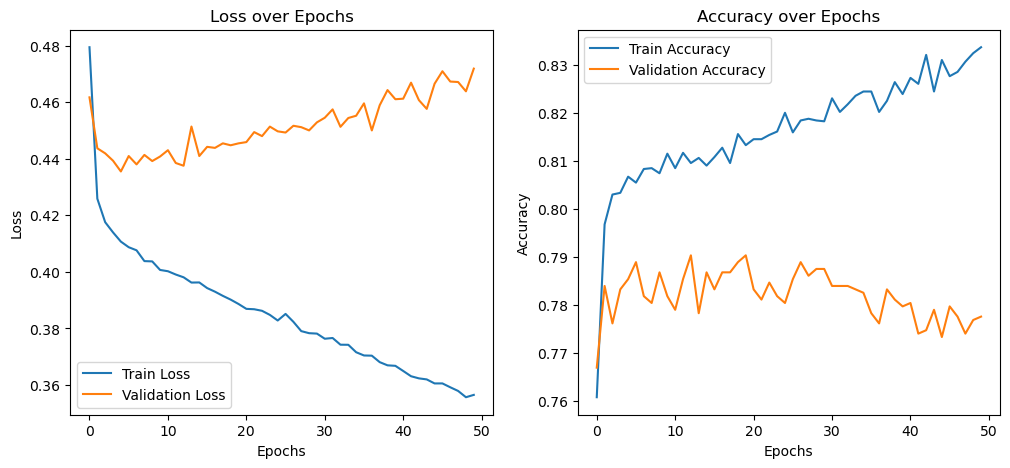

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


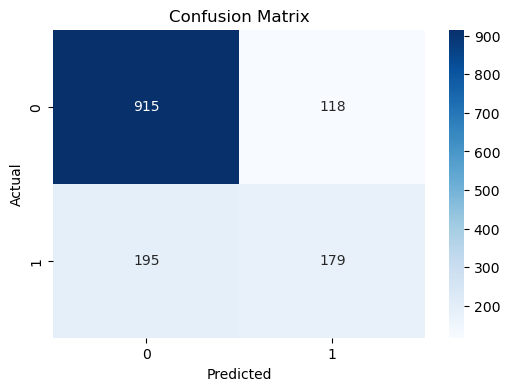

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85      1033
           1       0.60      0.48      0.53       374

    accuracy                           0.78      1407
   macro avg       0.71      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407



['X_columns.pkl']

In [20]:
# Import các thư viện cần thiết
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Bước 1: Đọc và tiền xử lý dữ liệu
df = pd.read_csv('clean_data.csv')

# Mã hóa các biến phân loại
label_encoder = LabelEncoder()

# Chuyển đổi các biến phân loại thành số
for column in ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
               'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
               'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
               'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']:
    df[column] = label_encoder.fit_transform(df[column])

# Chia tập dữ liệu thành features (X) và target (y)
X = df.drop(columns=['customerID', 'Churn'])  # Bỏ customerID và Churn
y = df['Churn']  # Target là cột 'Churn'

# Chuẩn hóa các đặc trưng số (tenure, MonthlyCharges, TotalCharges)
scaler = StandardScaler()
X[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(X[['tenure', 'MonthlyCharges', 'TotalCharges']])

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bước 2: Xây dựng mô hình ANN
model = Sequential()

# Thêm các lớp vào mô hình
model.add(Dense(units=32, activation='relu', input_shape=(X_train.shape[1],)))  # Lớp đầu vào
model.add(Dense(units=16, activation='relu'))  # Lớp ẩn
model.add(Dense(units=8, activation='relu'))   # Lớp ẩn
model.add(Dense(units=1, activation='sigmoid'))  # Lớp đầu ra (dự đoán xác suất)

# Biên dịch mô hình
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Bước 3: Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Bước 4: Đánh giá mô hình và trực quan hóa
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Model Accuracy: {accuracy*100:.2f}%')

# Trực quan hóa kết quả huấn luyện
plt.figure(figsize=(12, 5))

# Vẽ biểu đồ loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Vẽ biểu đồ accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Dự đoán trên tập kiểm tra
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Ma trận nhầm lẫn (Confusion Matrix)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Báo cáo phân loại
print("Classification Report:\n", classification_report(y_test, y_pred))

# Bước 5: Lưu mô hình bằng joblib
joblib.dump(model, 'ann_churn_model.pkl')
# Lưu scaler vào file
joblib.dump(scaler, 'scaler.pkl')
# Tương tự, bạn có thể lưu danh sách các cột
joblib.dump(X.columns, 'X_columns.pkl')